In [41]:
import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import Series
from pandas import DataFrame
from io import StringIO
from scipy import stats
from datetime import datetime
from pandas_datareader import DataReader
#PLOTTING 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
tech_list=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,190.102104,186.349008,188.212620,188.261721,3.269346e+07,186.811966
std,22.082519,21.779765,21.944381,21.921756,1.426121e+07,21.642001
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.262505,170.290001,171.640003,171.924999,2.288832e+07,170.762867
50%,188.445000,185.774994,187.235001,187.075005,2.910085e+07,185.464165
75%,209.312500,205.632496,207.299999,207.645000,3.912542e+07,205.888016
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-03-28 to 2019-03-28
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


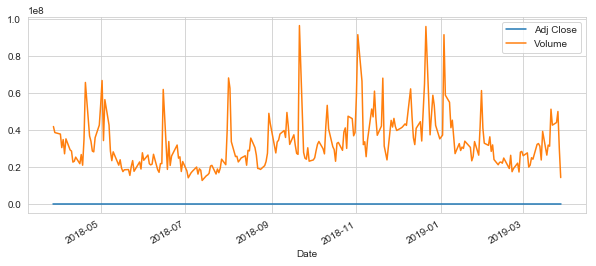

In [7]:
AAPL.info()
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
AAPL['Volume'].plot(legend=True,figsize=(10,4))

ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

-0.09960740391691691


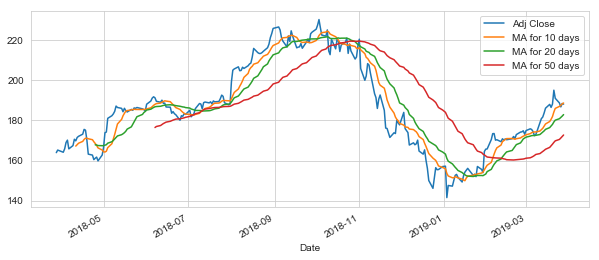

In [25]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
#AAPL['Daily Return'].plot(legend=True, figsize=(10,4), marker=' o', linestyle='--')#Daily return
#sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

print(AAPL['Daily Return'].min())

Symbols           AAPL         AMZN         GOOG       MSFT
Date                                                       
2018-03-28  163.983002  1431.420044  1004.559998  87.906212
2018-03-29  165.263504  1447.339966  1031.790039  89.755013
2018-04-02  164.180008  1371.989990  1006.469971  87.050652
2018-04-03  165.864349  1392.050049  1013.409973  88.220894
2018-04-04  169.036072  1410.569946  1025.140015  90.797409
Symbols         AAPL      AMZN      GOOG      MSFT
Date                                              
2018-03-28       NaN       NaN       NaN       NaN
2018-03-29  0.007809  0.011122  0.027106  0.021032
2018-04-02 -0.006556 -0.052061 -0.024540 -0.030130
2018-04-03  0.010259  0.014621  0.006895  0.013443
2018-04-04  0.019122  0.013304  0.011575  0.029205


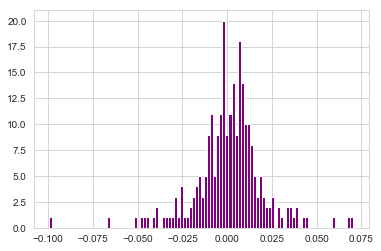

In [9]:
#OR
AAPL['Daily Return'].hist(bins=100,color='purple')
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']
print(closing_df.head())
tech_rets=closing_df.pct_change()
print(tech_rets.head())

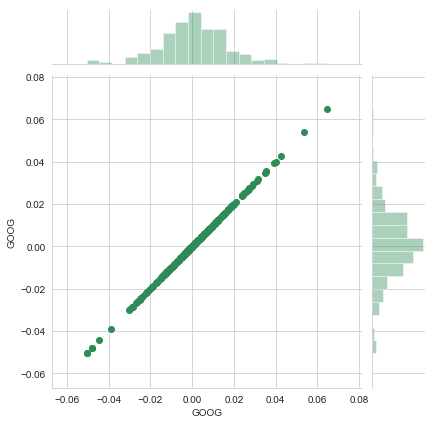

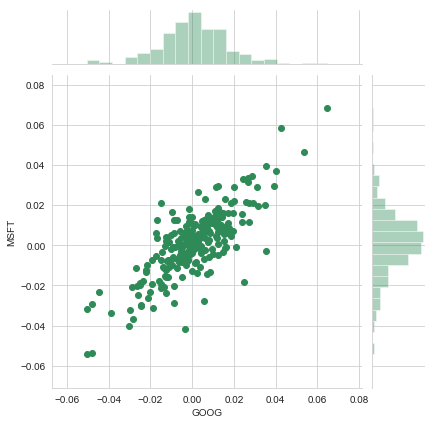

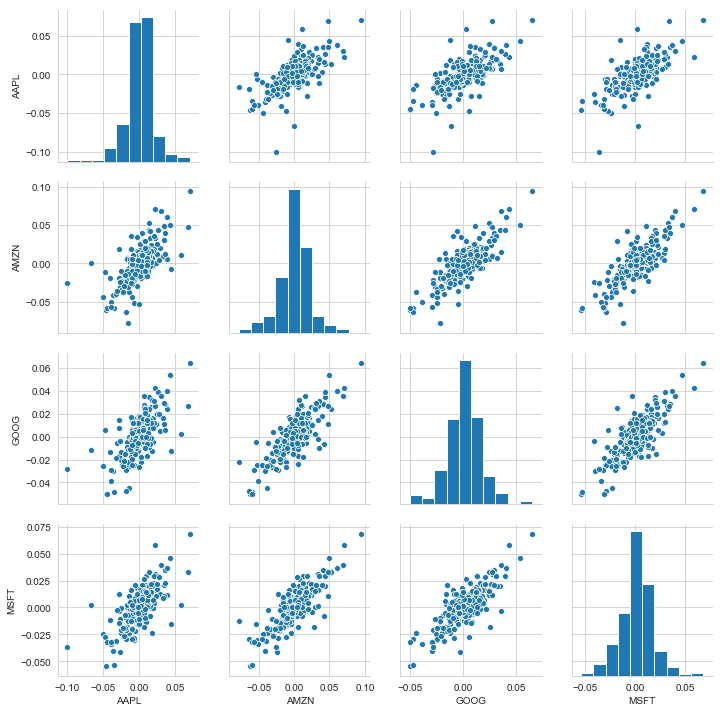

In [42]:
# Comapre to itself
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')
sns.pairplot(tech_rets.dropna())

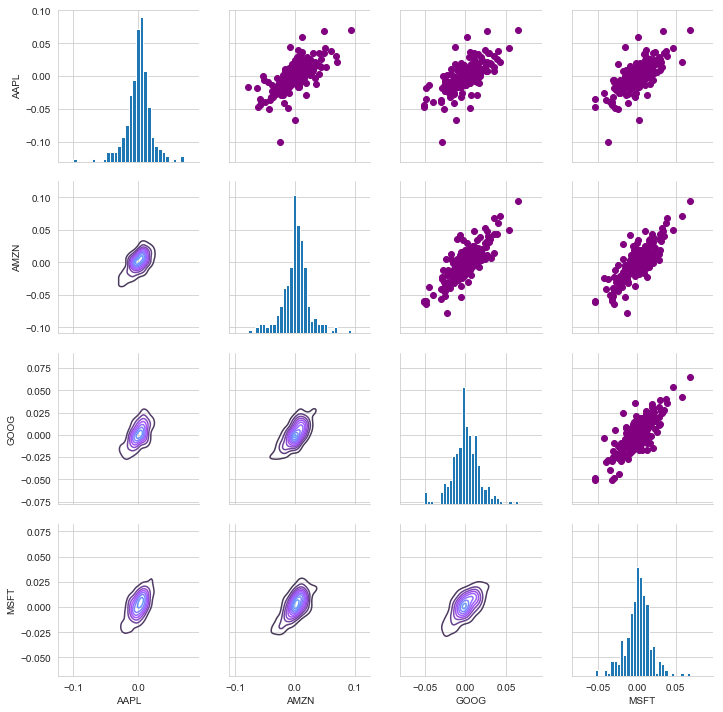

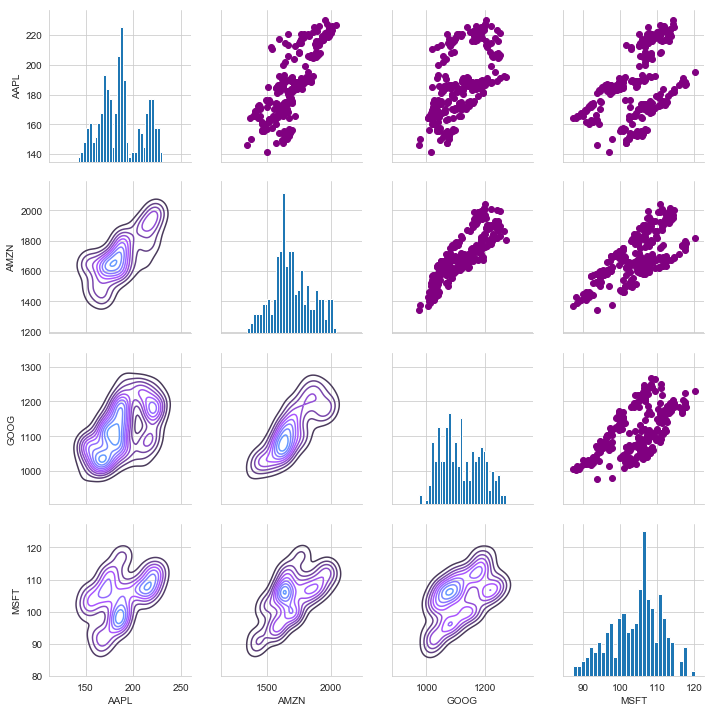

In [43]:
# contol the figure
returns_fig=sns.PairGrid(tech_rets.dropna(),)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

returns_fig=sns.PairGrid(closing_df.dropna(),)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
#WE CAN SEE GOOD CORRELATION BETWEEN BETWEEN MSFT & AMZN stocks

Symbols      AAPL      AMZN      GOOG      MSFT
Symbols                                        
AAPL     1.000000  0.781996  0.588495  0.460822
AMZN     0.781996  1.000000  0.845788  0.677538
GOOG     0.588495  0.845788  1.000000  0.601806
MSFT     0.460822  0.677538  0.601806  1.000000


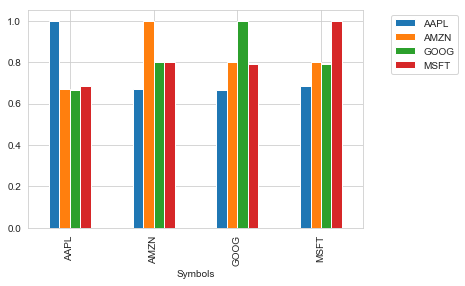

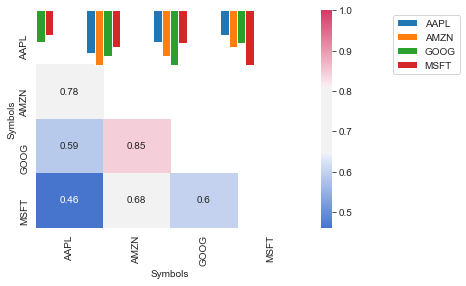

In [65]:
#PLOT THE CORRELATION TO SEE IF WE GUESSED CORRECTLY
corr1=tech_rets.dropna().corr()
corr2=closing_df.dropna().corr()
print(corr2)
corr1.dropna().plot(kind='bar',subplots=False)#GOOG and MSFT have highest CORRELATION
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
corr2.dropna().plot(kind='bar',subplots=False)#MSFT and AMZN have highest CLOSING CORRELATION
plt.legend(bbox_to_anchor=(1.6,1), loc="upper right")
mask=np.zeros_like(corr2)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr2,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

-0.02978997751792556
-0.0603035740509989
-0.040880459118195156
-0.047982348881493


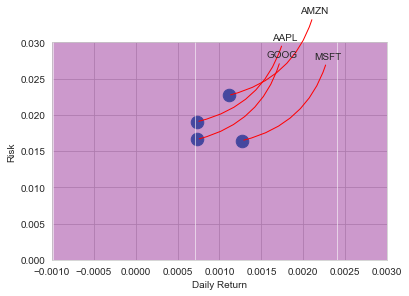

In [75]:
rets=tech_rets.dropna()
area=np.pi*50
plt.scatter(rets.mean(),rets.std(),s=area)
plt.ylim([0.015,0.030])
plt.xlim([-0.001,0.003])
plt.xlabel('Expexted return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
            label,
            xy=(x,y), xytext=(100,80),
            textcoords='offset points', ha='right', va='bottom',
            arrowprops=dict(arrowstyle='-',color='red',connectionstyle='arc3,rad=-0.3'))

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
print(tech_rets['AAPL'].quantile(0.05))
print(tech_rets['AMZN'].quantile(0.01))
print(tech_rets['MSFT'].quantile(0.01))
print(tech_rets['GOOG'].quantile(0.01))
# WITH 95 PC CONFIDENCE THE LOSS WONT BE MORE THAN rets*100 at 95% of days 

In [124]:
#MONTE CARLO METHOD{run various simulations, then find how risky a stock is}
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

def stock_monte_carlo (start_price,days,mu,sigma):
    #define price array
    price=np.zeros(days)
    price[0]=start_price
    #Shock and Drift
    shock=np.zeros(days)
    drift=np.zeros(days)
    # Run price array for number of days
    for x in range(1,days):
        # Calculate Schock, random normal to choose E0 value
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift, s(mu)(delta t)
        drift[x] = mu * dt
        # Calculate Price, S(sigma)(E0)(sqrt(delta t))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

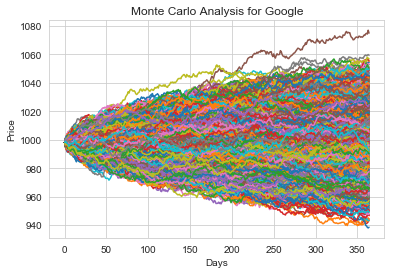

In [122]:
start_price=GOOG['Open'][0]

for run in range(10000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')
runs=10000
simulations=np.zeros(runs)

Text(0.5, 1.0, 'Final Price distribution of google price after 365 days')

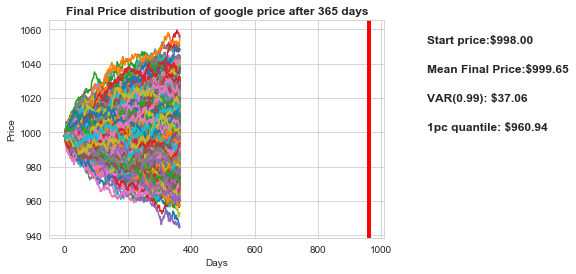

In [125]:
start_price=GOOG['Open'][0]

for run in range(1000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]
# we are gathering the end points of dataset(closing price) for 10K runs

q=np.percentile(simulations,1)
#plt.hist(simulations,bins=200)
plt.figtext(1,0.8,s='Start price:$%.2f' %start_price,weight='bold',size=12)
plt.figtext(1,0.7,s='Mean Final Price:$%.2f' %simulations.mean(),weight='bold',size=12)
plt.figtext(1,0.6,s='VAR(0.99): $%.2f' %(start_price-q,),weight='bold',size=12)   # Value at Risk
plt.figtext(1,0.5,s='1pc quantile: $%.2f' %q,weight='bold',size=12)              # Quantile plot
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u'Final Price distribution of google price after %s days' %days, weight='bold')